## Page Rank

### Page Rank Contoh

In [1]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 0)])

pr = nx.pagerank(G, alpha=0.85)
print(pr)

{0: 0.387789442707259, 1: 0.21481051315058508, 2: 0.3974000441421556}


In [2]:
import numpy as np

def pagerank(adj_matrix, d=0.85, max_iter=100, tol=1e-6):
    """
    Hitung PageRank dari matriks adjacency.

    Parameters:
        adj_matrix : array-like, shape (n, n)
            Matriks adjacency (1 jika ada link i -> j)
        d : float
            Damping factor (default: 0.85)
        max_iter : int
            Maksimum iterasi
        tol : float
            Toleransi konvergensi

    Returns:
        r : ndarray, shape (n,)
            Vektor PageRank
    """
    adj = np.array(adj_matrix, dtype=float)
    n = adj.shape[0]

    # Tangani dangling nodes (baris dengan jumlah 0)
    out_degree = np.sum(adj, axis=1)
    for i in range(n):
        if out_degree[i] == 0:
            adj[i, :] = 1.0  # taut ke semua halaman

    # Normalisasi baris → jadi matriks transisi (baris jumlah = 1)
    # TAPI: PageRank asli menggunakan TRANSPOSE → aliran masuk
    # Jadi kita transpos untuk membuat kolom = out-link
    M = adj / np.sum(adj, axis=1, keepdims=True)
    M = M.T  # Sekarang M[j,i] = probabilitas dari i ke j

    # Inisialisasi
    r = np.ones(n) / n
    teleport = (1 - d) / n

    for _ in range(max_iter):
        r_new = d * M @ r + teleport
        if np.linalg.norm(r_new - r, 1) < tol:
            break
        r = r_new

    return r

# Contoh penggunaan
if __name__ == "__main__":
    # Graf: 0 → 1, 0 → 2, 1 → 2, 2 → 0
    A = [
        [0, 1, 1],  # 0 links to 1 and 2
        [0, 0, 1],  # 1 links to 2
        [1, 0, 0],  # 2 links to 0
    ]

    pr = pagerank(A)
    print("PageRank:")
    for i, score in enumerate(pr):
        print(f"Node {i}: {score:.4f}")

PageRank:
Node 0: 0.3878
Node 1: 0.2148
Node 2: 0.3974


### Page Rank Testing

✅ Berhasil membaca file: Data/web-Google_10k.txt
Jumlah node: 10000
Jumlah edge: 78323

🏆 Top 5 PageRank tertinggi:
        Node  PageRank
994   486980  0.006515
3849  285814  0.004633
113   226374  0.003301
2847  163075  0.003288
5214  555924  0.002756


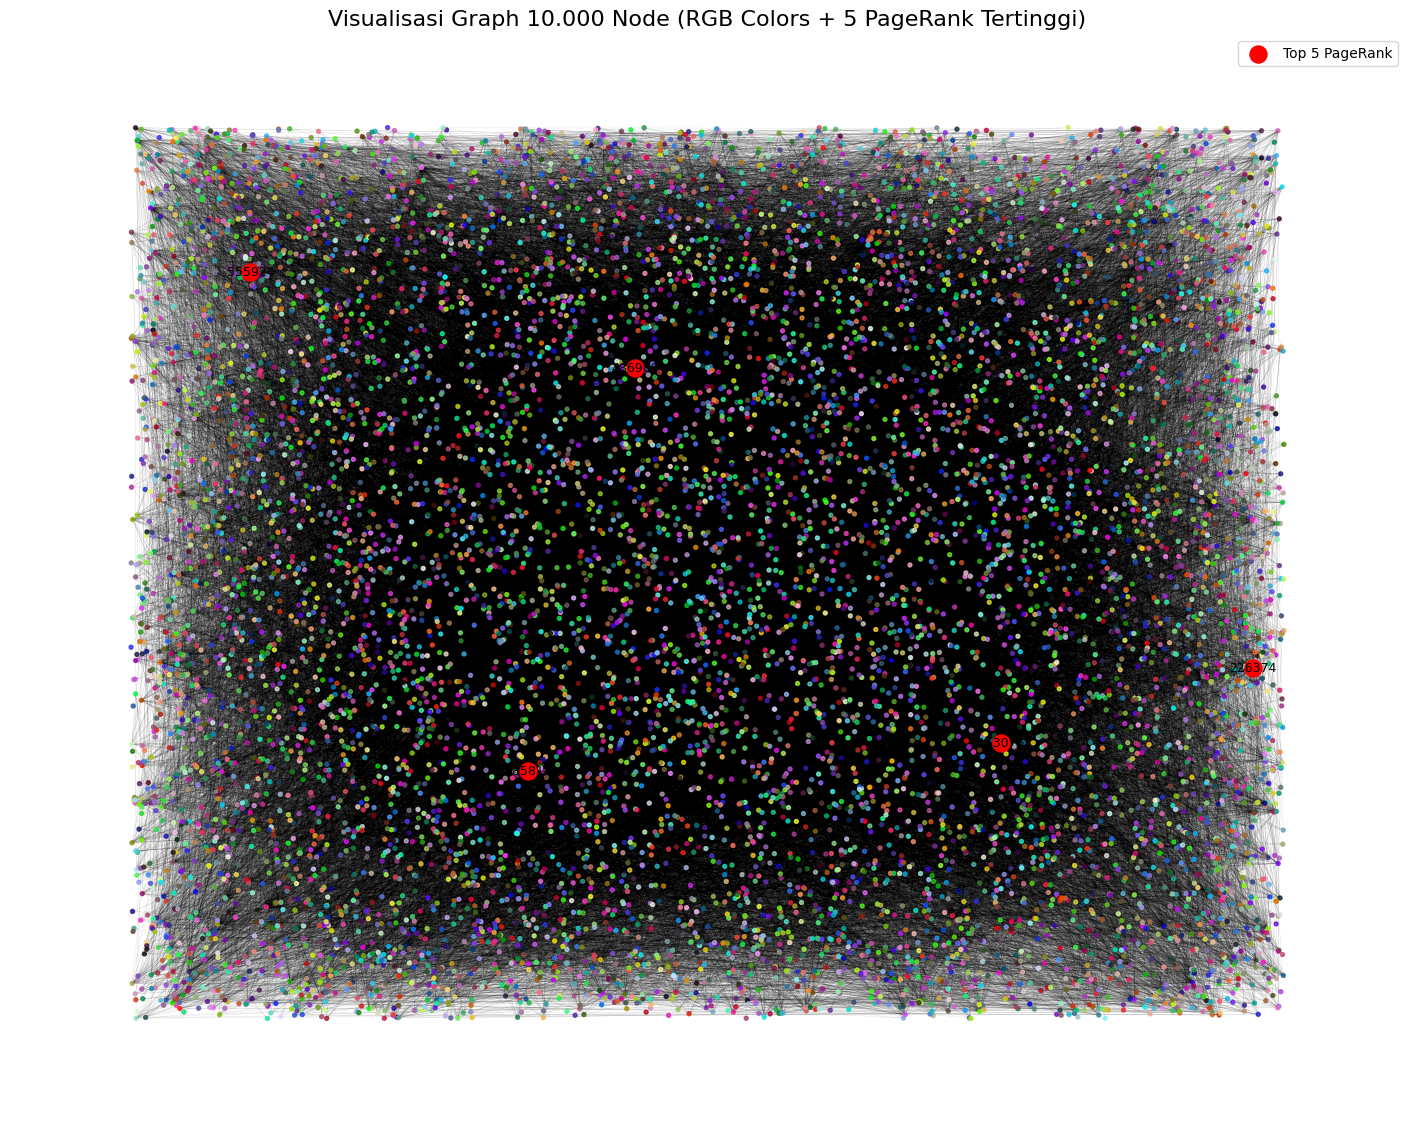

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# === 1️⃣ Baca file edgelist ===
file_name = 'Data/web-Google_10k.txt'

try:
    G = nx.read_edgelist(
        file_name,
        comments='#',
        create_using=nx.DiGraph(),
        nodetype=int
    )

    print(f"✅ Berhasil membaca file: {file_name}")
    print(f"Jumlah node: {G.number_of_nodes()}")
    print(f"Jumlah edge: {G.number_of_edges()}")

except FileNotFoundError:
    print(f"❌ File '{file_name}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")

# === 2️⃣ Hitung PageRank ===
pagerank = nx.pagerank(G, alpha=0.85)
pagerank_df = pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"]).sort_values("PageRank", ascending=False)

# === 3️⃣ Ambil 5 node dengan PageRank tertinggi ===
top5_nodes = pagerank_df.head(5)["Node"].tolist()
print("\n🏆 Top 5 PageRank tertinggi:")
print(pagerank_df.head(5))

# === 4️⃣ Layout dan warna ===
np.random.seed(42)  # agar warna konsisten tiap run
pos = nx.random_layout(G)  # layout ringan untuk graf besar
node_colors = np.random.rand(len(G.nodes()), 3)  # RGB acak untuk semua node

# === 5️⃣ Visualisasi ===
plt.figure(figsize=(18, 14))

# Semua node (warna-warni acak)
nx.draw_networkx_nodes(
    G, pos,
    node_size=8,
    node_color=node_colors,
    alpha=0.8
)

# 5 node penting (warna merah, ukuran besar)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top5_nodes,
    node_color="red",
    node_size=150,
    label="Top 5 PageRank"
)

# Garis edge abu-abu muda agar tidak berat
nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.15, arrows=False)

# Label hanya untuk 5 node penting
labels = {n: str(n) for n in top5_nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_color="black", font_size=9)

plt.title("Visualisasi Graph 10.000 Node (RGB Colors + 5 PageRank Tertinggi)", fontsize=16)
plt.legend(scatterpoints=1)
plt.axis("off")
plt.show()


### Page Rank Menggunakan Data Link Keluaran Teknik Informatika

In [34]:
# === BAGIAN 1: Import Library dan Baca File "semua_link_informatika.csv" ===
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

file_name = 'Data/semua_link_informatika.csv'

try:
    # Baca file tanpa header
    df = pd.read_csv(file_name, header=None)

    # Buat graf berarah dari dua kolom pertama
    G = nx.from_pandas_edgelist(
        df,
        source=0,
        target=1,
        create_using=nx.DiGraph()
    )

    print(f"✅ Berhasil membaca file: {file_name}")
    print(f"Jumlah node: {G.number_of_nodes()}")
    print(f"Jumlah edge: {G.number_of_edges()}")

except FileNotFoundError:
    print(f"❌ File '{file_name}' tidak ditemukan. Pastikan file berada di folder 'Data/'.")
except Exception as e:
    print(f"⚠️ Terjadi error saat membaca file: {e}")


✅ Berhasil membaca file: Data/semua_link_informatika.csv
Jumlah node: 1739
Jumlah edge: 1709


In [35]:
# === BAGIAN 2: Periksa isi dataset dan jumlah edge ===
edges = pd.read_csv(
    file_name,
    comment="#",
    header=None,
    names=["FromNodeId", "ToNodeId"],
    engine="python",
    sep=None,               # auto deteksi delimiter
    on_bad_lines="skip"     # lewati baris rusak
)

edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])
print(f"Jumlah edges: {len(edges)}")
print(edges.head())


Jumlah edges: 1709
                               FromNodeId  \
﻿No                                  Page   
1    https://informatika.trunojoyo.ac.id/   
2    https://informatika.trunojoyo.ac.id/   
3    https://informatika.trunojoyo.ac.id/   
4    https://informatika.trunojoyo.ac.id/   

                                              ToNodeId  
﻿No                                        Link Keluar  
1                 https://informatika.trunojoyo.ac.id/  
2    https://informatika.trunojoyo.ac.id/bidang-min...  
3    https://informatika.trunojoyo.ac.id/bidang-min...  
4    https://informatika.trunojoyo.ac.id/bidang-min...  


In [36]:
# === BAGIAN 3: Buat Graph dari edges ===
edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])

try:
    edges["FromNodeId"] = edges["FromNodeId"].astype(int)
    edges["ToNodeId"] = edges["ToNodeId"].astype(int)
except:
    pass  # kalau bukan angka, biarkan string

G = nx.DiGraph()
G.add_edges_from(edges[["FromNodeId", "ToNodeId"]].values)

print(f"Jumlah node dalam graph: {G.number_of_nodes()}")
print(f"Jumlah edge dalam graph: {G.number_of_edges()}")


Jumlah node dalam graph: 133
Jumlah edge dalam graph: 1545


In [38]:
# === BAGIAN 4: Hitung PageRank dan cari node penting ===
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06)

pagerank_df = (
    pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"])
    .sort_values("PageRank", ascending=False)
    .reset_index(drop=True)
)

print("🏆 Top 5 Node dengan PageRank Tertinggi:")
print(pagerank_df.head(5))


🏆 Top 5 Node dengan PageRank Tertinggi:
                                                Node  PageRank
0                    https://siakad.trunojoyo.ac.id/  0.010422
1  https://informatika.trunojoyo.ac.id/prestasi-m...  0.010422
2  https://informatika.trunojoyo.ac.id/kategori-p...  0.010422
3  https://informatika.trunojoyo.ac.id/unit-kegia...  0.010422
4  https://informatika.trunojoyo.ac.id/unit-kegia...  0.010422


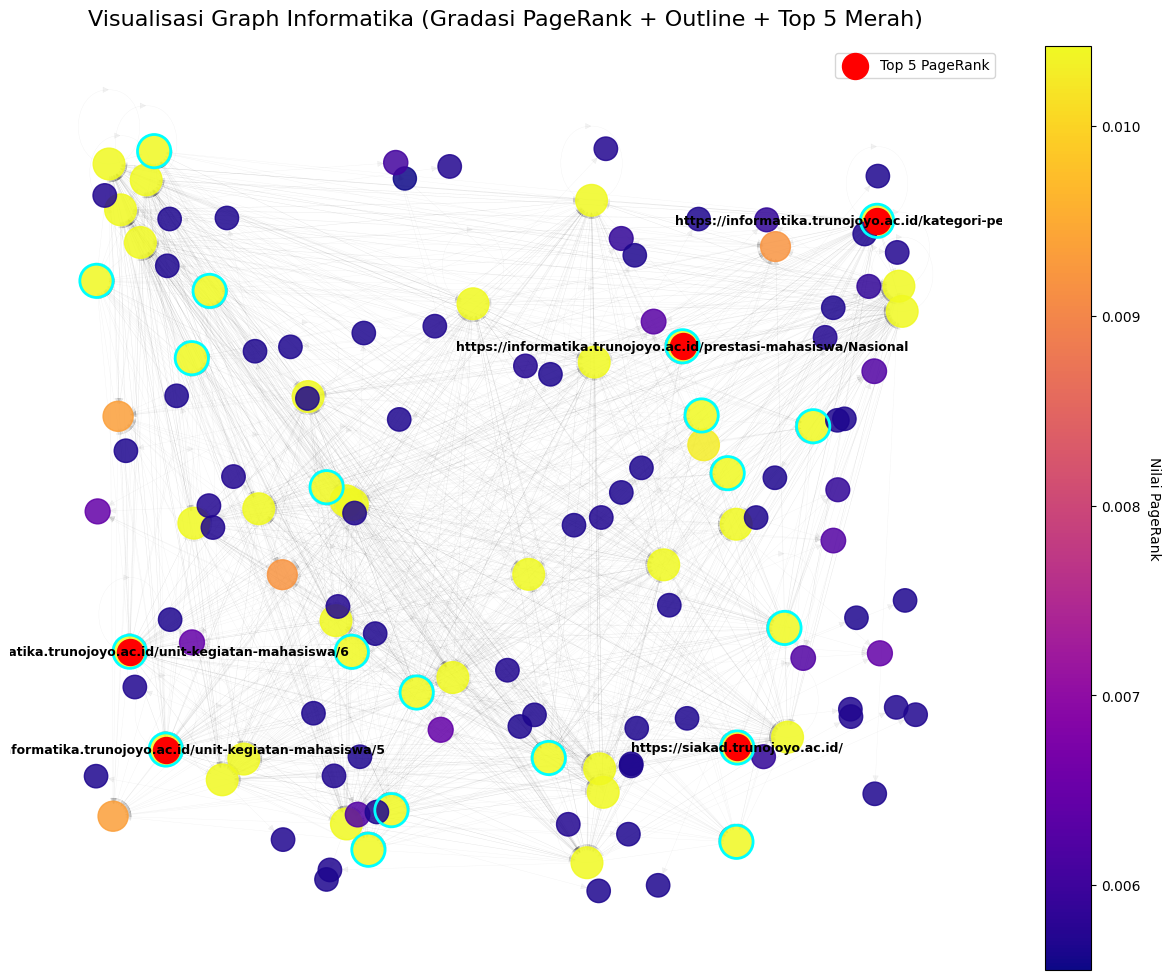

In [43]:
# === CELL 5: Visualisasi Graph Informatika (Outline Warna Terang) ===

fig, ax = plt.subplots(figsize=(14, 12))

# Layout ringan (acak tapi cepat)
pos = nx.random_layout(G, seed=42)

# Warna node berdasarkan nilai PageRank (gradasi)
node_colors = [pagerank[n] for n in G.nodes()]
node_sizes = [v * 50000 for v in pagerank.values()]

# Top 5 & Top 20 node
top5_nodes = pagerank_df.head(5)["Node"].tolist()
top20_nodes = pagerank_df.head(20)["Node"].tolist()
top5_labels = {n: str(n) for n in top5_nodes}

# Gambar semua node (gradasi plasma)
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    alpha=0.85,
    ax=ax
)

# Outline BERWARNA untuk Top 20 (biar jelas!)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top20_nodes,
    node_size=[pagerank[n]*55000 for n in top20_nodes],
    node_color='none',
    edgecolors="#00FFFF",   # 💠 cyan terang — bisa diganti 'lime', 'orange', 'deepskyblue', dll
    linewidths=2.0,         # sedikit lebih tebal supaya kontras
    ax=ax
)

# Node merah untuk Top 5 PageRank
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top5_nodes,
    node_color="red",
    node_size=350,
    label='Top 5 PageRank',
    ax=ax
)

# Gambar edge
nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.3, ax=ax)

# Label Top 5 node
nx.draw_networkx_labels(
    G, pos,
    labels=top5_labels,
    font_color="black",
    font_size=9,
    font_weight="bold",
    ax=ax
)

# Tambahkan colorbar
sm = plt.cm.ScalarMappable(
    cmap=plt.cm.plasma,
    norm=plt.Normalize(vmin=min(pagerank.values()), vmax=max(pagerank.values()))
)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Nilai PageRank", rotation=270, labelpad=15)

# Tampilan
ax.set_title(
    "Visualisasi Graph Informatika (Gradasi PageRank + Outline + Top 5 Merah)",
    fontsize=16, pad=15
)
ax.legend(scatterpoints=1, fontsize=10)
ax.axis("off")

plt.show()


### Page Rank Menggunakan Data Link Berita

In [44]:
# === BAGIAN 1: Import Library dan Baca File "tempo_links.csv" ===
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

file_name = 'Data/tempo_links.csv'

try:
    # Baca file CSV tanpa header (diasumsikan 2 kolom: source & target)
    df = pd.read_csv(file_name, header=None)

    # Buat graf berarah dari dua kolom pertama
    G = nx.from_pandas_edgelist(
        df,
        source=0,
        target=1,
        create_using=nx.DiGraph()
    )

    print(f"✅ Berhasil membaca file: {file_name}")
    print(f"Jumlah node: {G.number_of_nodes()}")
    print(f"Jumlah edge: {G.number_of_edges()}")

except FileNotFoundError:
    print(f"❌ File '{file_name}' tidak ditemukan. Pastikan file berada di folder 'Data/'.")
except Exception as e:
    print(f"⚠️ Terjadi error saat membaca file: {e}")


✅ Berhasil membaca file: Data/tempo_links.csv
Jumlah node: 947
Jumlah edge: 901


In [45]:
# === BAGIAN 2: Periksa isi dataset dan jumlah edge ===
edges = pd.read_csv(
    file_name,
    comment="#",
    header=None,
    names=["FromNodeId", "ToNodeId"],
    engine="python",
    sep=None,               # auto deteksi delimiter
    on_bad_lines="skip"     # lewati baris rusak
)

edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])
print(f"Jumlah edges: {len(edges)}")
print(edges.head())


Jumlah edges: 901
                                                   FromNodeId  \
﻿id_berita                                               page   
2068892     https://www.tempo.co/indeks?page=1&category=ru...   
2068883     https://www.tempo.co/indeks?page=1&category=ru...   
2068882     https://www.tempo.co/indeks?page=1&category=ru...   
2068873     https://www.tempo.co/indeks?page=1&category=ru...   

                                                     ToNodeId  
﻿id_berita                                        link_keluar  
2068892     https://www.tempo.co/politik/gerindra-anggap-s...  
2068883     https://www.tempo.co/politik/roy-suryo-ungkap-...  
2068882     https://www.tempo.co/politik/fadli-zon-digugat...  
2068873     https://www.tempo.co/politik/jusuf-kalla-tuntu...  


In [46]:
# === BAGIAN 3: Buat Graph dari edges ===
edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])

try:
    edges["FromNodeId"] = edges["FromNodeId"].astype(str)
    edges["ToNodeId"] = edges["ToNodeId"].astype(str)
except:
    pass

# Buat graph berarah
G = nx.DiGraph()
G.add_edges_from(edges[["FromNodeId", "ToNodeId"]].values)

print(f"Jumlah node dalam graph: {G.number_of_nodes()}")
print(f"Jumlah edge dalam graph: {G.number_of_edges()}")


Jumlah node dalam graph: 947
Jumlah edge dalam graph: 901


In [47]:
# === BAGIAN 4: Hitung PageRank dan Temukan Node Penting ===
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06)

pagerank_df = (
    pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"])
    .sort_values("PageRank", ascending=False)
    .reset_index(drop=True)
)

print("🏆 Top 5 Node dengan PageRank Tertinggi:")
print(pagerank_df.head(5))


🏆 Top 5 Node dengan PageRank Tertinggi:
                                                Node  PageRank
0                                        link_keluar  0.001875
1  https://www.tempo.co/hiburan/aturan-baru-tsa-m...  0.001057
2  https://www.tempo.co/internasional/kecelakaan-...  0.001057
3  https://www.tempo.co/internasional/trump-ganti...  0.001057
4  https://www.tempo.co/internasional/mengapa-as-...  0.001057


/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


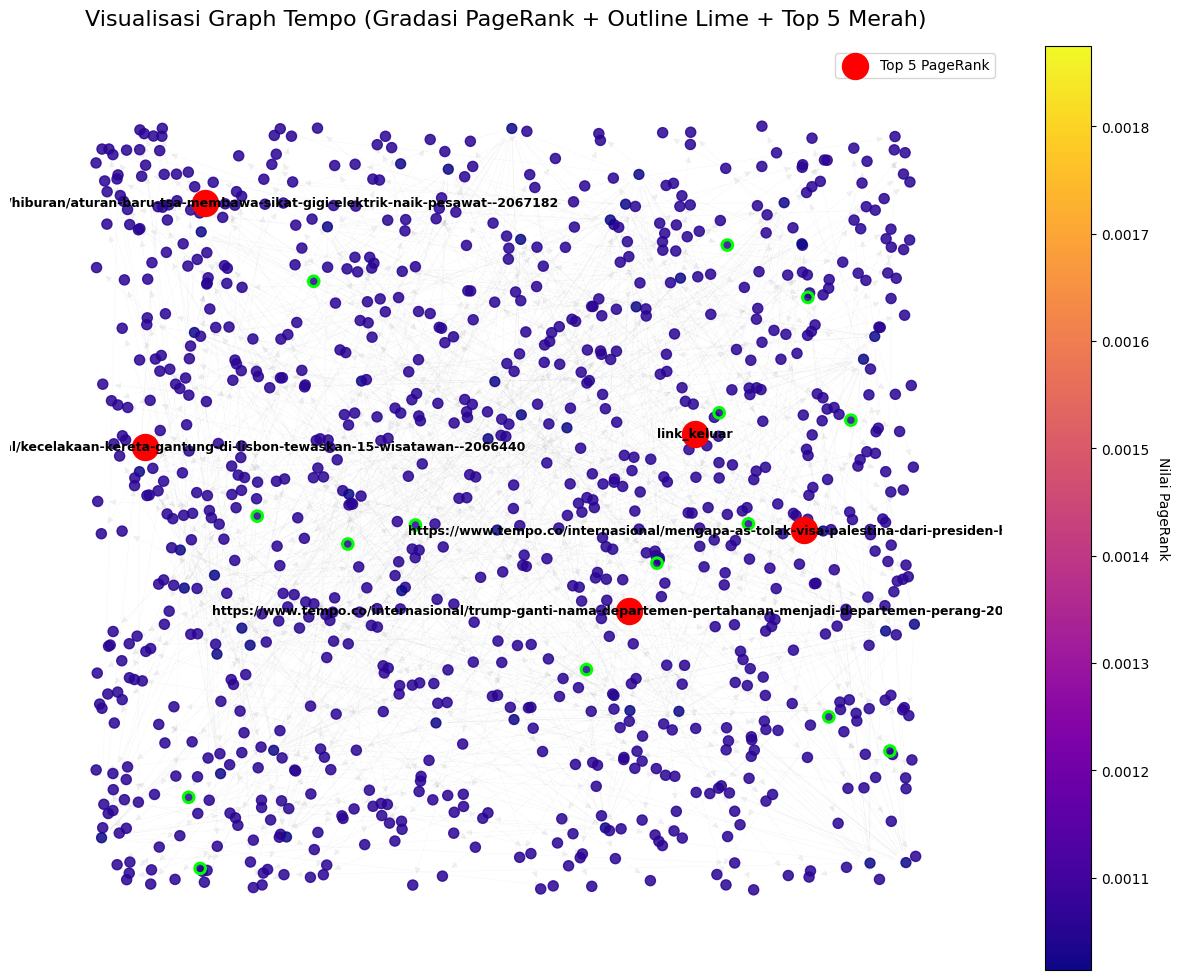

In [48]:
# === BAGIAN 5: Visualisasi Graph Tempo ===

fig, ax = plt.subplots(figsize=(14, 12))

# Layout ringan agar cepat (acak tapi stabil)
pos = nx.random_layout(G, seed=42)

# Warna node berdasarkan nilai PageRank
node_colors = [pagerank[n] for n in G.nodes()]
node_sizes = [v * 50000 for v in pagerank.values()]

# Ambil node penting
top5_nodes = pagerank_df.head(5)["Node"].tolist()
top20_nodes = pagerank_df.head(20)["Node"].tolist()
top5_labels = {n: str(n) for n in top5_nodes}

# Gambar semua node (gradasi plasma)
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    alpha=0.85,
    ax=ax
)

# Outline warna mencolok untuk Top 20 node
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top20_nodes,
    node_size=[pagerank[n]*55000 for n in top20_nodes],
    node_color='none',
    edgecolors='lime',   # 🌟 outline warna hijau neon biar jelas
    linewidths=2.2,
    ax=ax
)

# Node merah solid untuk Top 5 node tertinggi
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top5_nodes,
    node_color='red',
    node_size=350,
    label='Top 5 PageRank',
    ax=ax
)

# Edge halus
nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.3, ax=ax)

# Label hanya untuk 5 node tertinggi
nx.draw_networkx_labels(
    G, pos,
    labels=top5_labels,
    font_color='black',
    font_size=9,
    font_weight='bold',
    ax=ax
)

# Colorbar skala PageRank
sm = plt.cm.ScalarMappable(
    cmap=plt.cm.plasma,
    norm=plt.Normalize(vmin=min(pagerank.values()), vmax=max(pagerank.values()))
)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Nilai PageRank", rotation=270, labelpad=15)

# Tampilan
ax.set_title(
    "Visualisasi Graph Tempo (Gradasi PageRank + Outline Lime + Top 5 Merah)",
    fontsize=16, pad=15
)
ax.legend(scatterpoints=1, fontsize=10)
ax.axis("off")

plt.show()
